In [8]:
from sympy import *        # Trabajar una funcion de manera simbolica
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
style.use('fivethirtyeight')   # El fondo coja todo el cuadro
import time 

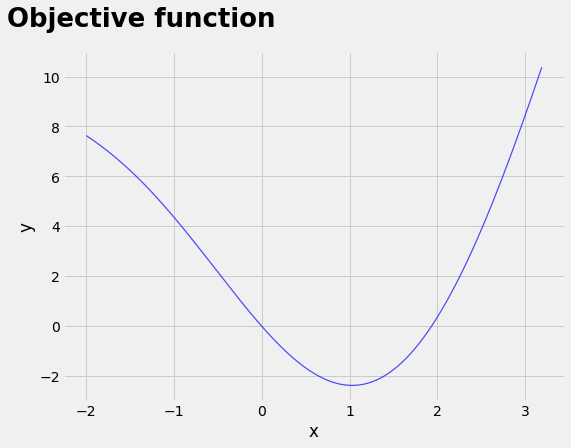

In [9]:
x = np.arange(-2,3.2,0.01)
y = x**2 - 4*np.sin(x)            # Function

fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
graph.text(x=-2.9,y=12,s='Objective function',fontsize=26, weight = 'bold')
plt.plot(x,y,color="b",alpha=0.7,linewidth=1.2)
graph.set_xlabel('x')
graph.set_ylabel('y')
plt.savefig("funcion1.svg")

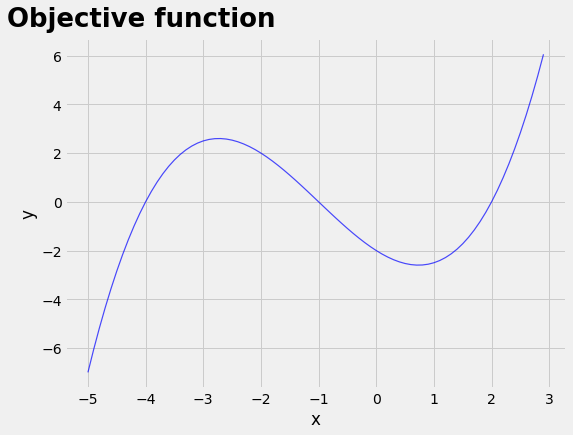

In [10]:
x = np.arange(-5,3,0.1)
y = 1/4*(x+4)*(x+1)*(x-2)             # Function

fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
graph.text(x=-6.4,y=7.2,s='Objective function',fontsize=26, weight = 'bold')
plt.plot(x,y,color="b",alpha=0.7,linewidth=1.2)
graph.set_xlabel('x')
graph.set_ylabel('y')
plt.savefig("funcion2.svg")



# Bisection Method

In [10]:
# Initial guess
a=1
b=3
x = Symbol('x')
y=x**2 - 4*sin(x)               # Function
tol = 1e-6                      # Tolerance for the length of the final interval
rootR=1.933753                  # Raiz real de la funcion

In [11]:
Error=[]
delta=[]
k=0
m = a + (b-a)/2
while (abs(m-rootR) > tol):
    #print(round(a,6))
    mA=m                  # valor de x--> k-1
    Error.append(abs(m-rootR))
    k=k+1
    if ((y.subs(x,a) < 0) & (y.subs(x,m) < 0)):
        a=m
    else:
        b=m
    m = a + (b-a)/2
    delta.append(abs(m-mA))
Error.append(abs(m-rootR))        # Añadir el ultimo valor de la raiz buscada

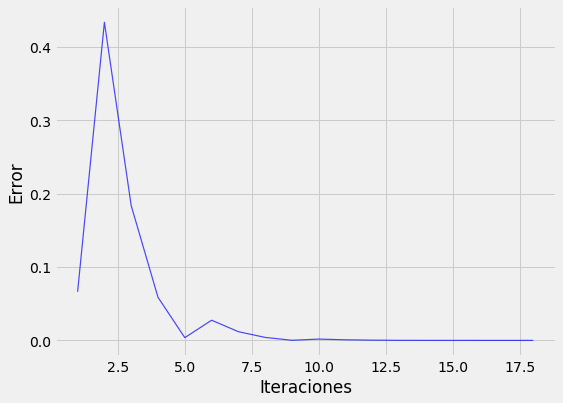

In [130]:
r=np.arange(1,k+2,1)
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(r,Error,color="b",alpha=0.7,linewidth=1.2)
graph.set_xlabel('Iteraciones')
graph.set_ylabel('Error')
plt.savefig("error_bisc.svg")

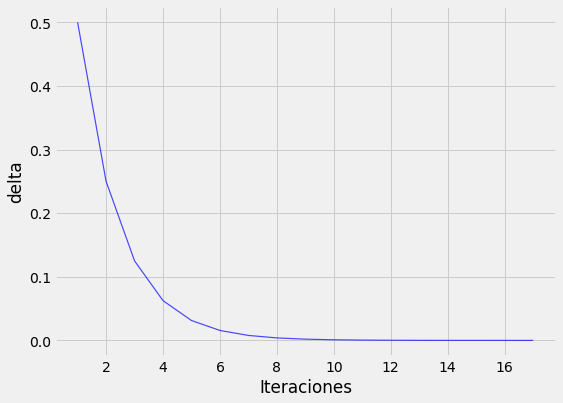

In [131]:
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(np.arange(1,k+1,1),delta,color="b",alpha=0.7,linewidth=1.2)

graph.set_xlabel('Iteraciones')
graph.set_ylabel('delta')
plt.savefig("delta_bisc.svg")

In [132]:
tiempo=[]
rootR=1.933753                  # Raiz real de la funcion
k=0
for i in [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]:    
    a=1
    b=3
    tol = i                         # Tolerance for the length of the final interval
    m = a + (b-a)/2  
    start = time.time()
    while (abs(m-rootR) > tol):
        if ((y.subs(x,a) < 0) & (y.subs(x,m) < 0)):
            a=m
        else:
            b=m
        m = a + (b-a)/2
    end = time.time()
    tiempo.append(end-start)
    k=k+1

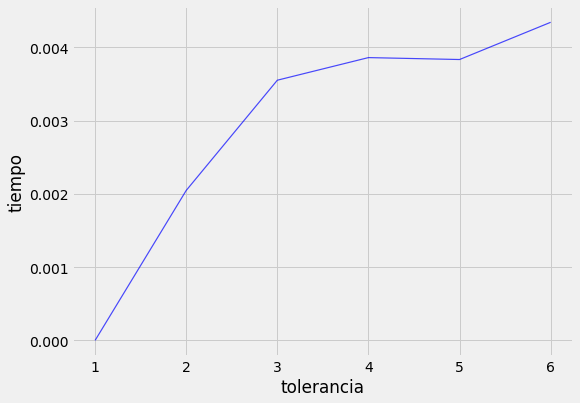

In [140]:
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(np.arange(1,k+1,1),tiempo,color="b",alpha=0.7,linewidth=1.2)

graph.set_xlabel('tolerancia')
graph.set_ylabel('tiempo')
plt.savefig("toleranciak.svg")

# Newton's Method

In [12]:
# Initial guess
x0 = 3
tol = 1e-6
fxp = y.diff(x,1)         # Derivada de la funcion de orden 1

In [13]:
ErrorN=[]
deltaN=[]
kN=0
rootR=1.933753                  # Raiz real de la funcion
while (abs(x0-rootR) >  tol):
    ErrorN.append(abs(x0-rootR))
    kN=kN+1
    xA=x0
    x0 = x0 - (y.subs(x,x0))/(fxp.subs(x,x0))
    x0=float(x0)
    deltaN.append(abs(x0-xA))
ErrorN.append(abs(x0-rootR))        # Añadir el ultimo valor de la raiz buscada

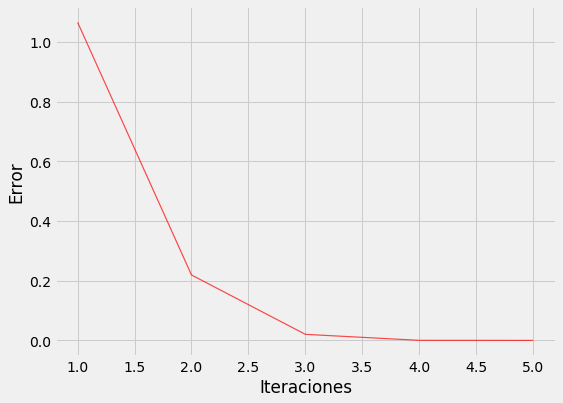

In [14]:
r=np.arange(1,kN+2,1)
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(r,ErrorN,color="r",alpha=0.7,linewidth=1.2)

graph.set_xlabel('Iteraciones')
graph.set_ylabel('Error')
plt.savefig("error_Newton.svg")

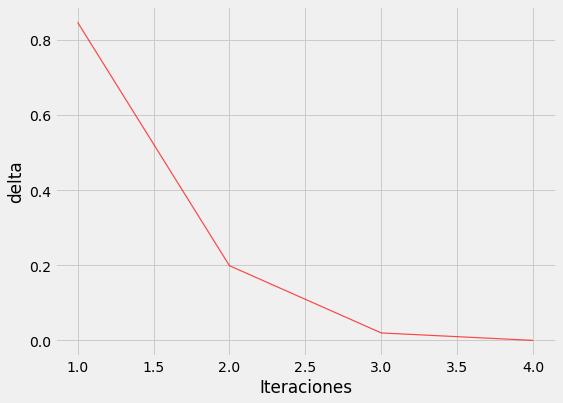

In [15]:
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(np.arange(1,kN+1,1),deltaN,color="r",alpha=0.7,linewidth=1.2)

graph.set_xlabel('Iteraciones')
graph.set_ylabel('delta')
plt.savefig("delta_newton.svg")

In [16]:
tiempoN=[]
rootR=1.933753                  # Raiz real de la funcion
k=0
for i in [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]:    
    x0 = 3
    start = time.time()
    while (abs(x0-rootR) >  tol):
        x0 = x0 - (y.subs(x,x0))/(fxp.subs(x,x0))
        x0=float(x0)
    end = time.time()
    tiempoN.append(end-start)
    k=k+1

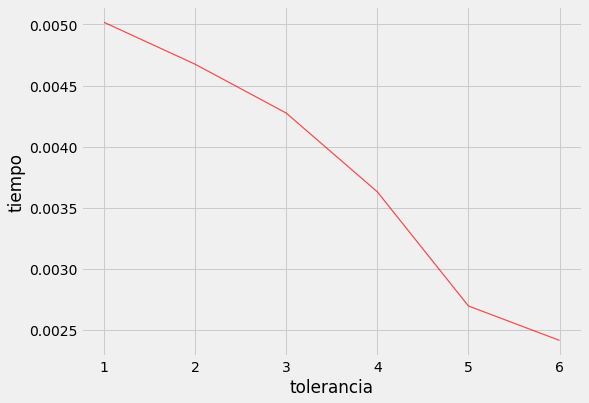

In [158]:
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(np.arange(1,k+1,1),tiempoN,color="R",alpha=0.7,linewidth=1.2)

graph.set_xlabel('tolerancia')
graph.set_ylabel('tiempo')
plt.savefig("toleranciak_newton.svg")

# Secant Method

In [184]:
# Initial guess
x0 =1
x1 =3
kS=0
ErrorS=[]
deltaS=[]
tol=1e-6
rootR=1.933753                  # Raiz real de la funcion
while (abs(x1-rootR) >  tol):
    ErrorS.append(abs(x1-rootR))
    xA=x1
    x1 = x1 - (((y.subs(x,x1))*(x1-x0))/(y.subs(x,x1)-y.subs(x,x0)))
    x1=float(x1)
    x0=xA
    deltaS.append(abs(x1-x0))
    kS=kS+1
ErrorS.append(abs(x0-rootR))        # Añadir el ultimo valor de la raiz buscada

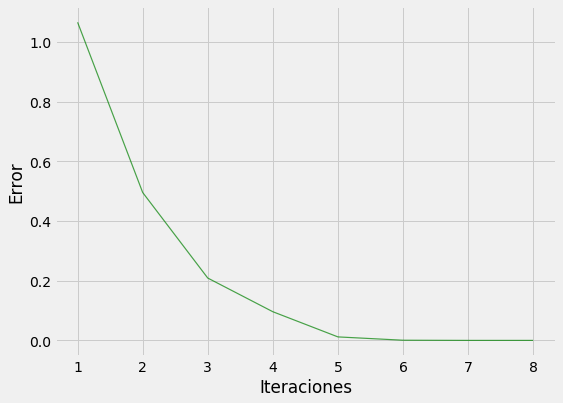

In [185]:
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(np.arange(1,kS+2,1),ErrorS,color="g",alpha=0.7,linewidth=1.2)

graph.set_xlabel('Iteraciones')
graph.set_ylabel('Error')
plt.savefig("error_Secante.svg")

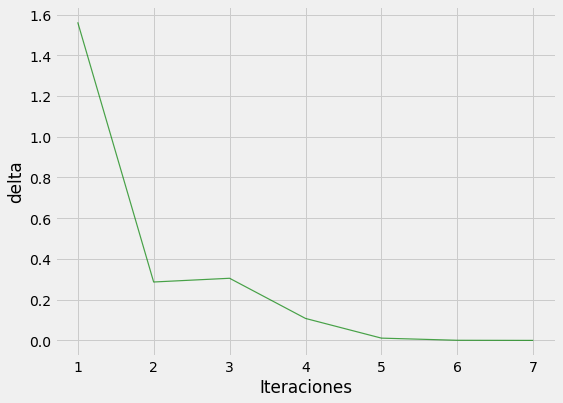

In [186]:
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(np.arange(1,kS+1,1),deltaS,color="g",alpha=0.7,linewidth=1.2)

graph.set_xlabel('Iteraciones')
graph.set_ylabel('delta')
plt.savefig("delta_secante.svg")

In [203]:
tiempoS=[]
rootR=1.933753                  # Raiz real de la funcion
k=0
for i in [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]:    
    x0 =1
    x1 =3
    start = time.time()
    time.clock()     
    while (abs(x1-rootR) >  tol):
        ErrorS.append(abs(x1-rootR))
        xA=x1
        x1 = x1 - (((y.subs(x,x1))*(x1-x0))/(y.subs(x,x1)-y.subs(x,x0)))
        x1=float(x1)
        x0=xA
    tiempo=time.time() - start
    tiempoS.append(tiempo)
    k=k+1
    
    

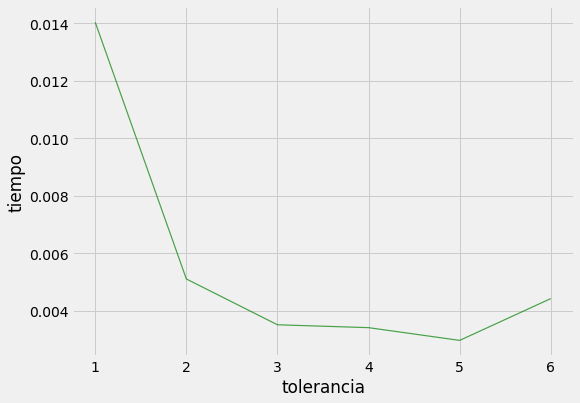

In [205]:
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(np.arange(1,k+1,1),tiempoS,color="g",alpha=0.7,linewidth=1.2)

graph.set_xlabel('tolerancia')
graph.set_ylabel('tiempo')
plt.savefig("toleranciak_secante.svg")

# Interpolación Inversa

In [5]:
# Initial guess
a=1
b=2
c=3
tol=1e-6

In [6]:
ErrorII=[]
deltaII=[]
k=0
rootR=1.933753                  # Raiz real de la funcion
while (abs(b-rootR) >  tol):
    ErrorII.append(abs(b-rootR))
    u=y.subs(x,b)/y.subs(x,c)
    v=y.subs(x,b)/y.subs(x,a)
    w=y.subs(x,a)/y.subs(x,c)
    p=v*(w*(u-w)*(c-b)-(1-u)*(b-a))
    q=(w-1)*(u-1)*(v-1)
    c=a
    a=b
    b=b+(p/q)   
    k=k+1    
    b=float(b)
    deltaII.append(abs(b-a))
ErrorII.append(abs(b-rootR))        # Añadir el ultimo valor de la raiz buscada





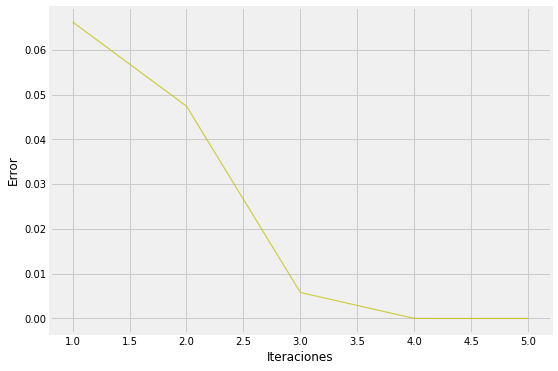

In [7]:
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(np.arange(1,k+2,1),ErrorII,color="y",alpha=0.7,linewidth=1.2)

graph.set_xlabel('Iteraciones')
graph.set_ylabel('Error')
plt.savefig("error_II.svg")

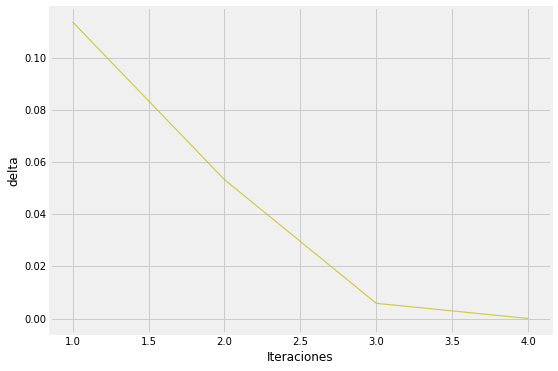

In [8]:
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(np.arange(1,k+1,1),deltaII,color="y",alpha=0.7,linewidth=1.2)

graph.set_xlabel('Iteraciones')
graph.set_ylabel('delta')
plt.savefig("delta_II.svg")

In [9]:
tiempoII=[]
rootR=1.933753                  # Raiz real de la funcion
k=0
for i in [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]: 
    tiempo=0
    start=0
    a=1
    b=2
    c=3
    tol=i
    start = time.time()
    while (abs(b-rootR) >  tol):
        u=y.subs(x,b)/y.subs(x,c)
        v=y.subs(x,b)/y.subs(x,a)
        w=y.subs(x,a)/y.subs(x,c)
        p=v*(w*(u-w)*(c-b)-(1-u)*(b-a))
        q=(w-1)*(u-1)*(v-1)
        c=a
        a=b
        b=b+(p/q)   
        b=float(b)
        deltaII.append(abs(b-a))
        print(b)
    ErrorII.append(abs(b-rootR))        # Añadir el ultimo valor de la raiz buscada
    tiempo=time.time()-start
    tiempoII.append(tiempo)
    k=k+1    
    print(k)


    

1
1.886317942073566
1.9395578093811239
2
1.886317942073566
1.9395578093811239
1.9337424334528397
3
1.886317942073566
1.9395578093811239
1.9337424334528397
4
1.886317942073566
1.9395578093811239
1.9337424334528397
1.93375376487761
5
1.886317942073566
1.9395578093811239
1.9337424334528397
1.93375376487761
6


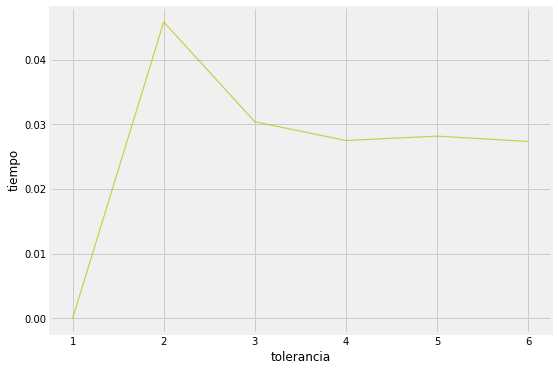

In [10]:
fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
plt.plot(np.arange(1,k+1,1),tiempoII,color="y",alpha=0.7,linewidth=1.2)

graph.set_xlabel('tolerancia')
graph.set_ylabel('tiempo')
plt.savefig("toleranciak_II.svg")